In [181]:
import pandas as pd
import numpy as np
import os, sys, pytz
import matplotlib.pyplot as plt
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
code_list = [i.split('.csv')[0] for i in os.listdir('./historical_price_data/')]


  0%|          | 0/1 [00:46<?, ?it/s]


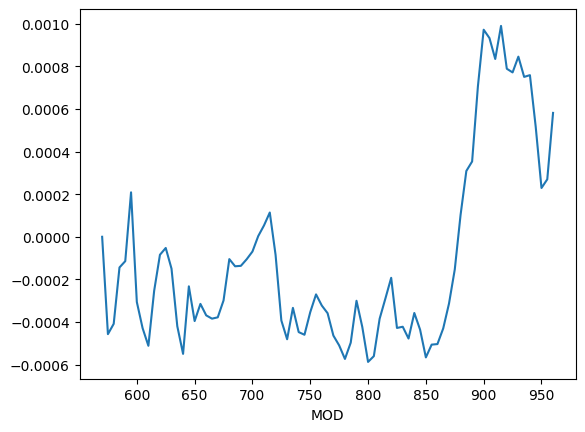

In [267]:
data_list = []
for code in tqdm(['TQQQ']):
    path = f'./historical_price_data/{code}.csv'
    data = pd.read_csv(path,index_col=0)
    data.index = pd.Series([i.replace(tzinfo=None) for i in pd.to_datetime(data.index)]).dt.tz_localize(pytz.timezone('US/Eastern'))
    
    a = data.resample('5min').mean().dropna()
    a['change_rate'] = (a['close'] - a['open'])/a['open']
    a['change_bi'] = np.where((a['close'] - a['open'])>0,1,0)
    a['date'] = pd.to_datetime([i.date() for i in a.index])
    a['year'] = a.date.dt.year
    a['DOW'] = a.date.dt.day_of_week
    a['DOY'] = a.date.dt.day_of_year
    a['MOD'] = [i.hour*60+i.minute for i in a.index]
    a['HOD'] = [i.hour for i in a.index]
    a = a[(a.MOD>=9.5*60) & (a.MOD<=16*60)]
    def calc_one_day(df):
        start = df.iloc[0,:]['close']
        df['change_from_today_start'] = (df['close'] - start)/start
        return df
    a = a.groupby('date').apply(calc_one_day)
    a.groupby('MOD').mean()['change_from_today_start'].plot()
#     plt.title(code)
#     plt.show()
    a['code'] = code
    data_list.append(a)
    break

    
    

In [268]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
from tech_indicator_utils import tech_indivator_calculator
df = a.copy()

function_list = [i for i in dir(tech_indivator_calculator) if i.startswith('calc')]
for function_name in tqdm(function_list):
    func = getattr(tech_indivator_calculator,function_name)
    indicator_name = function_name.split('calculate_')[1]
    
    #### period 20
    p = 20
    if indicator_name=='bollinger_bands':
        res1, res2 = func(df, period=p)
        df['Indicator_'+indicator_name+'_upper'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_lower'+f'_p{p}'] = res2
    elif indicator_name=='macd':
        res1,res2,res3 = func(df, span_short=p, span_long=p*2, span_signal=p-2)
        df['Indicator_'+indicator_name+'_macd'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_signal'+f'_p{p}'] = res2
        df['Indicator_'+indicator_name+'_histogram'+f'_p{p}'] = res3
    elif indicator_name=='stochastic_oscillator':
        res1, res2 = func(df, period=p, smooth_window=2)
        df['Indicator_'+indicator_name+'_k'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_d'+f'_p{p}'] = res2
    elif indicator_name=='obv':
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df)
    else:
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df, period=p)
        
    #### period 10
    p = 10
    if indicator_name=='bollinger_bands':
        res1, res2 = func(df, period=p)
        df['Indicator_'+indicator_name+'_upper'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_lower'+f'_p{p}'] = res2
    elif indicator_name=='macd':
        res1,res2,res3 = func(df, span_short=p, span_long=p*2, span_signal=p-2)
        df['Indicator_'+indicator_name+'_macd'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_signal'+f'_p{p}'] = res2
        df['Indicator_'+indicator_name+'_histogram'+f'_p{p}'] = res3
    elif indicator_name=='stochastic_oscillator':
        res1, res2 = func(df, period=p, smooth_window=2)
        df['Indicator_'+indicator_name+'_k'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_d'+f'_p{p}'] = res2
    elif indicator_name=='obv':
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df)
    else:
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df, period=p)

    #### period 5
    p = 5
    if indicator_name=='bollinger_bands':
        res1, res2 = func(df, period=p)
        df['Indicator_'+indicator_name+'_upper'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_lower'+f'_p{p}'] = res2
    elif indicator_name=='macd':
        res1,res2,res3 = func(df, span_short=p, span_long=p*2, span_signal=p-2)
        df['Indicator_'+indicator_name+'_macd'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_signal'+f'_p{p}'] = res2
        df['Indicator_'+indicator_name+'_histogram'+f'_p{p}'] = res3
    elif indicator_name=='stochastic_oscillator':
        res1, res2 = func(df, period=p, smooth_window=2)
        df['Indicator_'+indicator_name+'_k'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_d'+f'_p{p}'] = res2
    elif indicator_name=='obv':
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df)
    else:
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df, period=p)
    
    #### period 3
    p = 3
    if indicator_name=='bollinger_bands':
        res1, res2 = func(df, period=p)
        df['Indicator_'+indicator_name+'_upper'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_lower'+f'_p{p}'] = res2
    elif indicator_name=='macd':
        res1,res2,res3 = func(df, span_short=p, span_long=p*2, span_signal=p-2)
        df['Indicator_'+indicator_name+'_macd'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_signal'+f'_p{p}'] = res2
        df['Indicator_'+indicator_name+'_histogram'+f'_p{p}'] = res3
    elif indicator_name=='stochastic_oscillator':
        res1, res2 = func(df, period=p, smooth_window=2)
        df['Indicator_'+indicator_name+'_k'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_d'+f'_p{p}'] = res2
    elif indicator_name=='obv':
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df)
    else:
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df, period=p)
        
    #### period 2
    p = 2
    if indicator_name=='bollinger_bands':
        res1, res2 = func(df, period=p)
        df['Indicator_'+indicator_name+'_upper'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_lower'+f'_p{p}'] = res2
    elif indicator_name=='macd':
        res1,res2,res3 = func(df, span_short=p, span_long=p*2, span_signal=1)
        df['Indicator_'+indicator_name+'_macd'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_signal'+f'_p{p}'] = res2
        df['Indicator_'+indicator_name+'_histogram'+f'_p{p}'] = res3
    elif indicator_name=='stochastic_oscillator':
        res1, res2 = func(df, period=p, smooth_window=1)
        df['Indicator_'+indicator_name+'_k'+f'_p{p}'] = res1
        df['Indicator_'+indicator_name+'_d'+f'_p{p}'] = res2
    elif indicator_name=='obv':
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df)
    else:
        df['Indicator_'+indicator_name+f'_p{p}'] = func(df, period=p)
        

100%|██████████| 10/10 [01:56<00:00, 11.67s/it]


In [270]:
x_names = ['DOY','DOW','year'] + [i for i in df.columns if i.startswith('Indicator')]
df_for_training = df.dropna()
df_for_training[x_names] = df_for_training[x_names].shift(1)
df_for_training = df_for_training.dropna()
X = df_for_training[x_names]
y = df_for_training['change_bi']


In [271]:
df_for_training

,open,high,low,close,volume,trade_count,vwap,change_rate,change_bi,date,...,Indicator_stochastic_oscillator_d_p5,Indicator_stochastic_oscillator_k_p3,Indicator_stochastic_oscillator_d_p3,Indicator_stochastic_oscillator_k_p2,Indicator_stochastic_oscillator_d_p2,Indicator_williams_r_p20,Indicator_williams_r_p10,Indicator_williams_r_p5,Indicator_williams_r_p3,Indicator_williams_r_p2
2021-01-04 12:45:00-05:00,41.56800,41.60400,41.49400,41.53800,169865.6,526.6,41.546000,-0.000722,0,2021-01-04,...,36.191260,12.299465,15.499326,15.646259,15.646259,-90.965092,-84.853701,-89.449541,-87.700535,-84.353741
2021-01-04 12:50:00-05:00,41.66400,41.74600,41.62400,41.72800,180768.8,470.8,41.690000,0.001536,1,2021-01-04,...,9.349303,11.055276,11.677371,20.952381,20.952381,-96.406571,-92.222222,-91.851852,-88.944724,-79.047619
2021-01-04 12:55:00-05:00,41.98600,42.04200,41.94800,42.00800,271320.8,619.2,42.002000,0.000524,1,2021-01-04,...,28.551062,92.857143,51.956210,92.857143,92.857143,-86.652977,-65.147453,-51.046025,-7.142857,-7.142857
2021-01-04 13:00:00-05:00,42.04800,42.09400,41.99000,42.05200,188078.4,518.6,42.042000,0.000095,1,2021-01-04,...,71.374798,93.795620,93.326382,91.866029,91.866029,-71.991701,-5.923345,-6.204380,-6.204380,-8.133971
2021-01-04 13:05:00-05:00,42.01600,42.05600,41.96600,42.02400,145744.8,389.6,42.010000,0.000190,1,2021-01-04,...,93.397810,91.063830,92.429725,71.232877,71.232877,-69.067797,-7.000000,-7.000000,-8.936170,-28.767123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 15:40:00-04:00,28.04880,28.06798,28.03002,28.04480,315847.8,774.0,28.050448,-0.000143,0,2023-03-31,...,58.290446,11.066320,47.032814,11.066320,11.066320,-29.838569,-36.499973,-74.256243,-88.933680,-88.933680
2023-03-31 15:45:00-04:00,28.03900,28.05798,28.01500,28.03420,391500.6,897.4,28.037097,-0.000171,0,2023-03-31,...,16.174229,6.604701,8.835510,11.967611,11.967611,-45.593368,-56.337269,-93.395299,-93.395299,-88.032389
2023-03-31 15:50:00-04:00,27.99602,28.04798,27.97402,28.01528,656279.2,1226.4,28.012643,0.000688,1,2023-03-31,...,7.322451,13.860814,10.232758,36.240091,36.240091,-47.905759,-77.657543,-91.959799,-86.139186,-63.759909
2023-03-31 15:55:00-04:00,28.24800,28.29398,28.21422,28.26410,1374996.6,2656.0,28.255007,0.000570,1,2023-03-31,...,11.393751,43.912303,28.886559,49.142449,49.142449,-52.033159,-85.252699,-85.252699,-56.087697,-50.857551


In [272]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score
from scipy.stats import spearmanr

def reg_scorer(pred, y_test):
    r2 = r2_score(pred, y_test)
    spearman_r = spearmanr(pred, y_test)[0]
    return {'r2':r2,'spearman_r':spearman_r}

def cls_scorer(pred, y_test):
    f1 = f1_score(pred, y_test)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    return {'f1':f1,'precision':precision,'recall':recall}




In [273]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = X[X.index<'2023-01-01']
X_test = X[(X.index>='2023-01-01') & (X.index<='2023-4-01')]
y_train = y[y.index<'2023-01-01']
y_test = y[(y.index>='2023-01-01') & (y.index<='2023-4-01')]

model = XGBClassifier(random_state=42)
model = model.fit(X_train, y_train)


In [280]:
pred = np.where(model.predict_proba(X_test)[:,1]>0.1,1,0)
cls_scorer(pred, y_test)

{'f1': 0.6531938948558508,
 'precision': 0.4944373127941806,
 'recall': 0.9621149042464613}

In [281]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [282]:
model.predict_proba(X_test)[:,1]

array([0.24606615, 0.30887696, 0.30837485, ..., 0.2403611 , 0.28819782,
       0.23943125], dtype=float32)

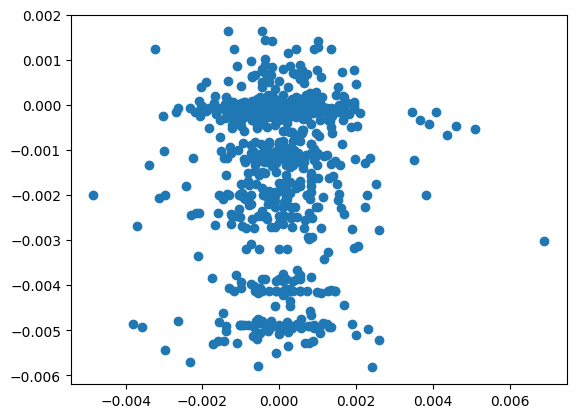

In [196]:
plt.scatter(
    y_test,pred
)

In [135]:
X

,DOY,DOW,Indicator_adx,Indicator_bollinger_bands_upper,Indicator_bollinger_bands_lower,Indicator_ema,Indicator_macd_macd,Indicator_macd_signal,Indicator_macd_histogram,Indicator_mfi,Indicator_obv,Indicator_rsi,Indicator_sma,Indicator_stochastic_oscillator_k,Indicator_stochastic_oscillator_d,Indicator_williams_r
2021-01-04 11:45:00-05:00,4.0,0.0,51.281259,33.226157,31.890257,32.656680,-0.399456,-0.450260,0.050804,35.002862,-899883.6,31.636962,32.558207,30.580383,31.647188,-69.419617
2021-01-04 11:50:00-05:00,4.0,0.0,47.424629,33.175485,31.870817,32.618897,-0.383631,-0.436934,0.053303,40.788643,-867340.6,38.824109,32.523151,37.783200,31.239960,-62.216800
2021-01-04 11:55:00-05:00,4.0,0.0,42.830531,33.123492,31.865156,32.592598,-0.360255,-0.421598,0.061343,45.248984,-831571.6,42.289951,32.494324,49.808296,39.390626,-50.191704
2021-01-04 12:00:00-05:00,4.0,0.0,39.531736,33.049097,31.852311,32.549414,-0.354077,-0.408094,0.054017,37.979230,-934736.4,36.465871,32.450704,20.563671,36.051722,-79.436329
2021-01-04 12:05:00-05:00,4.0,0.0,38.008034,32.965387,31.800395,32.475331,-0.374528,-0.401381,0.026853,37.422523,-1040246.6,31.058069,32.382891,3.609159,24.660375,-96.390841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 15:40:00-04:00,90.0,4.0,18.744394,11.663217,11.527523,11.609584,-0.000707,-0.011728,0.011021,60.494053,1685770.6,53.776815,11.595370,42.276317,77.825755,-57.723683
2023-03-31 15:45:00-04:00,90.0,4.0,17.486010,11.664162,11.527948,11.609500,-0.000861,-0.009555,0.008694,66.658711,1730547.2,57.199748,11.596055,48.633951,61.271527,-51.366049
2023-03-31 15:50:00-04:00,90.0,4.0,17.357241,11.671436,11.525054,11.614119,0.002960,-0.007052,0.010012,70.631166,1806450.8,62.338620,11.598245,80.551599,57.153956,-19.448401
2023-03-31 15:55:00-04:00,90.0,4.0,17.829359,11.686556,11.517520,11.621727,0.008793,-0.003883,0.012676,75.398003,1913823.8,66.466266,11.602038,93.040251,74.075267,-6.959749


DOY                                  0
DOW                                  0
Indicator_adx                        0
Indicator_bollinger_bands_upper      0
Indicator_bollinger_bands_lower      0
Indicator_ema                        0
Indicator_macd_macd                  0
Indicator_macd_signal                0
Indicator_macd_histogram             0
Indicator_mfi                        0
Indicator_obv                        0
Indicator_rsi                        0
Indicator_sma                        0
Indicator_stochastic_oscillator_k    0
Indicator_stochastic_oscillator_d    0
Indicator_williams_r                 0
dtype: int64

In [106]:
len('Indicator_'+indicator_name)

25

In [103]:
indicator_name

'bollinger_bands'

In [104]:
df

,open,high,low,close,volume,trade_count,vwap,date,MOD,HOD,change_from_today_start,code,Indicator_adx
2021-01-04 09:30:00-05:00,34.65400,34.84400,34.55062,34.70196,230317.2,1146.6,34.698248,2021-01-04,570,9,0.000000,PLUG,NaN
2021-01-04 09:35:00-05:00,34.49548,34.57500,34.26402,34.31960,174883.0,1149.8,34.397497,2021-01-04,575,9,-0.011018,PLUG,NaN
2021-01-04 09:40:00-05:00,33.84644,33.92720,33.65000,33.82324,166265.4,1053.4,33.773196,2021-01-04,580,9,-0.025322,PLUG,NaN
2021-01-04 09:45:00-05:00,33.54802,33.65690,33.39000,33.45018,130949.4,988.6,33.527847,2021-01-04,585,9,-0.036072,PLUG,NaN
2021-01-04 09:50:00-05:00,33.19200,33.26558,33.03000,33.13134,159552.2,1255.2,33.139899,2021-01-04,590,9,-0.045260,PLUG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 15:40:00-04:00,11.60132,11.61300,11.59500,11.60870,44776.6,228.8,11.604628,2023-03-31,940,15,0.021806,PLUG,17.486010
2023-03-31 15:45:00-04:00,11.64500,11.66500,11.63334,11.65800,75903.6,332.2,11.648382,2023-03-31,945,15,0.026146,PLUG,17.357241
2023-03-31 15:50:00-04:00,11.68700,11.70600,11.67500,11.69400,107373.0,496.8,11.688326,2023-03-31,950,15,0.029314,PLUG,17.829359
2023-03-31 15:55:00-04:00,11.74798,11.76000,11.73200,11.74500,258748.6,910.8,11.746999,2023-03-31,955,15,0.033803,PLUG,20.357057


2021-01-04 09:30:00-05:00          NaN
2021-01-04 09:35:00-05:00          NaN
2021-01-04 09:40:00-05:00          NaN
2021-01-04 09:45:00-05:00          NaN
2021-01-04 09:50:00-05:00          NaN
                               ...    
2023-03-31 15:40:00-04:00    17.486010
2023-03-31 15:45:00-04:00    17.357241
2023-03-31 15:50:00-04:00    17.829359
2023-03-31 15:55:00-04:00    20.357057
2023-03-31 16:00:00-04:00    23.395810
Length: 44620, dtype: float64

In [85]:
(np.array([1,2,3,4]) > np.array([1,2,3,4])) & (np.array([1,2,3,4]) > np.array([1,2,3,4]))

array([False, False, False, False])

In [26]:
df

['calculate_adx',
 'calculate_atr',
 'calculate_bollinger_bands',
 'calculate_cci',
 'calculate_chaikin_oscillator',
 'calculate_ma',
 'calculate_macd',
 'calculate_obv',
 'calculate_roc',
 'calculate_rsi',
 'calculate_rvi',
 'calculate_stochastic_oscillator']

In [19]:
tech_indivator_calculator

tech_indicator_utils.tech_indivator_calculator

In [6]:
data_all = pd.concat(data_list)

In [ ]:
data_all

In [ ]:
import pickle
with open('data_all.pkl','wb') as f:
    pickle.dump(data_all, f)


In [11]:
import pickle
with open('data_all.pkl','rb') as f:
    data_all = pickle.load(f)


EOFError: Ran out of input

In [ ]:
data_all

In [123]:
data_all[data_all.code=='TQQQ']

,open,high,low,close,volume,trade_count,vwap,date,MOD,HOD,change_from_today_start,code
2021-01-04 09:30:00-05:00,45.50,45.56,45.30,45.31,1167284.0,1816.0,45.48,2021-01-04,570,9,0.000000,TQQQ
2021-01-04 09:31:00-05:00,45.30,45.38,45.25,45.33,477232.0,1588.0,45.32,2021-01-04,571,9,0.000441,TQQQ
2021-01-04 09:32:00-05:00,45.32,45.33,45.21,45.22,368136.0,1139.0,45.26,2021-01-04,572,9,-0.001986,TQQQ
2021-01-04 09:33:00-05:00,45.20,45.21,45.10,45.14,478364.0,1331.0,45.15,2021-01-04,573,9,-0.003752,TQQQ
2021-01-04 09:34:00-05:00,45.14,45.20,45.11,45.17,314464.0,980.0,45.15,2021-01-04,574,9,-0.003090,TQQQ
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 15:56:00-04:00,22.49,22.58,22.47,22.58,980119.0,1828.0,22.52,2023-03-14,956,15,0.022182,TQQQ
2023-03-14 15:57:00-04:00,22.58,22.62,22.56,22.61,762876.0,1795.0,22.60,2023-03-14,957,15,0.023540,TQQQ
2023-03-14 15:58:00-04:00,22.61,22.64,22.57,22.63,737152.0,1453.0,22.61,2023-03-14,958,15,0.024445,TQQQ
2023-03-14 15:59:00-04:00,22.64,22.73,22.62,22.64,2151981.0,3746.0,22.68,2023-03-14,959,15,0.024898,TQQQ


In [ ]:
#### day



In [98]:
a

,open,high,low,close,volume,trade_count,vwap,date,MOD,HOD,change
2022-01-03 09:30:00-05:00,60.530,60.8700,60.50,60.660,683617.0,2006.0,60.620000,2022-01-03,570,9,0.000000
2022-01-03 09:31:00-05:00,60.640,60.7700,60.61,60.770,74230.0,770.0,60.690000,2022-01-03,571,9,0.001813
2022-01-03 09:32:00-05:00,60.770,60.8300,60.72,60.790,69208.0,540.0,60.780000,2022-01-03,572,9,0.002143
2022-01-03 09:33:00-05:00,60.780,60.8100,60.72,60.780,43073.0,420.0,60.770000,2022-01-03,573,9,0.001978
2022-01-03 09:34:00-05:00,60.810,60.8300,60.76,60.820,42515.0,351.0,60.810000,2022-01-03,574,9,0.002638
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 15:56:00-04:00,48.960,49.0200,48.95,49.015,128839.0,1204.0,48.972054,2023-03-14,956,15,0.004612
2023-03-14 15:57:00-04:00,49.020,49.0400,49.00,49.040,188016.0,1502.0,49.022536,2023-03-14,957,15,0.005124
2023-03-14 15:58:00-04:00,49.035,49.0650,49.01,49.060,190166.0,1549.0,49.042265,2023-03-14,958,15,0.005534
2023-03-14 15:59:00-04:00,49.060,49.1475,49.05,49.050,728280.0,4006.0,49.097692,2023-03-14,959,15,0.005329


<Axes: xlabel='MOD'>

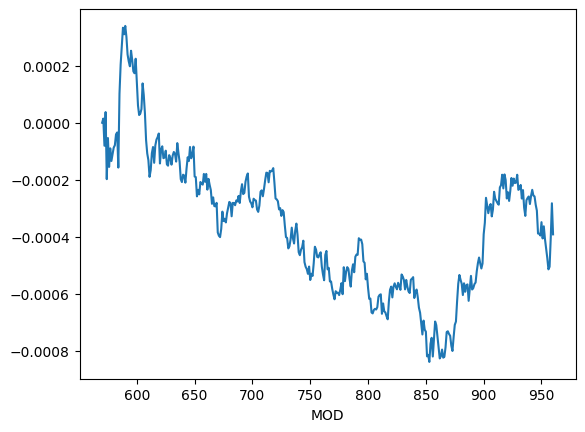

In [99]:
a.groupby('MOD').mean()['change'].plot()

In [83]:
a

,open,high,low,close,volume,trade_count,vwap,date,MOD,HOD
2021-12-31 19:57:00-05:00,60.99,60.99,60.99,60.99,100.0,1.0,60.990000,2021-12-31,1197,19
2022-01-03 04:04:00-05:00,60.98,60.98,60.98,60.98,316.0,2.0,60.980000,2022-01-03,244,4
2022-01-03 06:06:00-05:00,60.97,60.97,60.96,60.96,4643.0,15.0,60.960000,2022-01-03,366,6
2022-01-03 06:47:00-05:00,61.01,61.01,61.01,61.01,101.0,2.0,61.010000,2022-01-03,407,6
2022-01-03 06:57:00-05:00,61.07,61.07,61.07,61.07,500.0,2.0,61.070000,2022-01-03,417,6
...,...,...,...,...,...,...,...,...,...,...
2023-03-14 19:28:00-04:00,48.93,48.93,48.92,48.92,12800.0,75.0,48.920717,2023-03-14,1168,19
2023-03-14 19:34:00-04:00,48.93,48.93,48.93,48.93,300.0,3.0,48.930000,2023-03-14,1174,19
2023-03-14 19:46:00-04:00,49.00,49.00,49.00,49.00,200.0,2.0,49.000000,2023-03-14,1186,19
2023-03-14 19:49:00-04:00,48.93,48.93,48.93,48.93,100.0,1.0,48.930000,2023-03-14,1189,19


In [ ]:
def calc_

In [84]:
a[['close','MOD','date']]

,close,MOD,date
2021-12-31 19:57:00-05:00,60.99,1197,2021-12-31
2022-01-03 04:04:00-05:00,60.98,244,2022-01-03
2022-01-03 06:06:00-05:00,60.96,366,2022-01-03
2022-01-03 06:47:00-05:00,61.01,407,2022-01-03
2022-01-03 06:57:00-05:00,61.07,417,2022-01-03
...,...,...,...
2023-03-14 19:28:00-04:00,48.92,1168,2023-03-14
2023-03-14 19:34:00-04:00,48.93,1174,2023-03-14
2023-03-14 19:46:00-04:00,49.00,1186,2023-03-14
2023-03-14 19:49:00-04:00,48.93,1189,2023-03-14


<Axes: xlabel='MOD'>

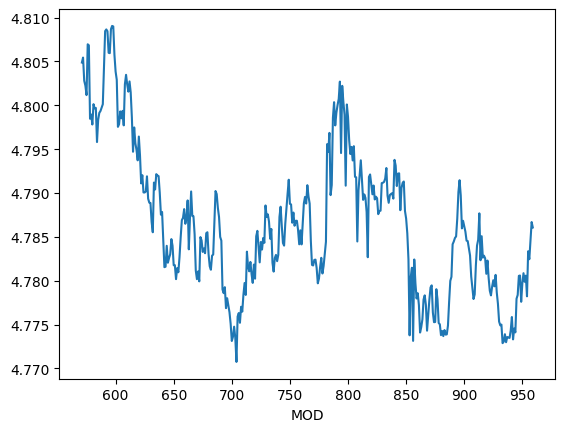

In [82]:
a[(a.MOD>9.5*60) & (a.MOD<16*60)].groupby('MOD').std().dropna()['close'].plot()

In [54]:
a.index

DatetimeIndex(['2021-12-31 19:57:00-05:00', '2022-01-03 04:04:00-05:00',
               '2022-01-03 06:06:00-05:00', '2022-01-03 06:47:00-05:00',
               '2022-01-03 06:57:00-05:00', '2022-01-03 07:00:00-05:00',
               '2022-01-03 07:09:00-05:00', '2022-01-03 07:11:00-05:00',
               '2022-01-03 07:12:00-05:00', '2022-01-03 07:15:00-05:00',
               ...
               '2023-03-14 17:00:00-04:00', '2023-03-14 17:01:00-04:00',
               '2023-03-14 17:04:00-04:00', '2023-03-14 17:09:00-04:00',
               '2023-03-14 17:26:00-04:00', '2023-03-14 19:28:00-04:00',
               '2023-03-14 19:34:00-04:00', '2023-03-14 19:46:00-04:00',
               '2023-03-14 19:49:00-04:00', '2023-03-14 19:57:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', length=140191, freq=None)

In [16]:
pd.to_datetime(data.index)

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True

In [15]:
data.index

Index([2021-12-31 19:57:00-05:00, 2022-01-03 04:04:00-05:00,
       2022-01-03 06:06:00-05:00, 2022-01-03 06:47:00-05:00,
       2022-01-03 06:57:00-05:00, 2022-01-03 07:00:00-05:00,
       2022-01-03 07:09:00-05:00, 2022-01-03 07:11:00-05:00,
       2022-01-03 07:12:00-05:00, 2022-01-03 07:15:00-05:00,
       ...
       2023-03-14 17:00:00-04:00, 2023-03-14 17:01:00-04:00,
       2023-03-14 17:04:00-04:00, 2023-03-14 17:09:00-04:00,
       2023-03-14 17:26:00-04:00, 2023-03-14 19:28:00-04:00,
       2023-03-14 19:34:00-04:00, 2023-03-14 19:46:00-04:00,
       2023-03-14 19:49:00-04:00, 2023-03-14 19:57:00-04:00],
      dtype='object', length=140191)